# BabyLM Corpus Analysis

In the following notebook, we analyze the annotation distribution overlaps across BabyLM sub-corpora. To do so, we first compute the annotation overlaps usign DECAF:

In [ ]:
!cd ../../../ && bash experiments/babylm/scripts/overlap.sh

Next, we load in the annotation overlaps into Pandas.

In [30]:
import pandas as pd

statistics = pd.read_pickle('../outputs/annotation_overlaps.pkl')
display(statistics)

Abbr    Case                  Definite          \
                          Yes     Acc     Gen      Nom      Def     Ind   
bnc_spoken.train         2738  185454   80596   793359   316784  171004   
childes.train         3648752  704955  343685  2269727   735000  529610   
gutenberg.train         85705  672584  627006  1602115  1585522  644068   
open_subtitles.train    55250  764240  390052  2101077   638652  440676   
simple_wiki.train       97068   51785  135214   336327   957004  380688   
switchboard.train         453   23741   13644   140600    36442   29797   

                      Degree                 ExtPos  ...    xpos           \
                         Cmp      Pos    Sup    ADP  ...     VBP      VBZ   
bnc_spoken.train       31565   570855   9865    587  ...  302672   180445   
childes.train          83309  1657326   8384     73  ...  926993  1007795   
gutenberg.train       120554  2455038  55614   2753  ...  406837   314233   
open_subtitles.train   73274  1514966  30174   1483  ...  794947   467403   
simple_wiki.train      55018  1164895  50306  12558  ...  163108   422544   
switchboard.train       5440    95494   2112     49  ...   73527    25733   

                                                                 Gender  \
                         WDT      WP   WP$     WRB      `` POS Fem,Masc   
bnc_spoken.train       44920   73707   290   59225     894   5      0.0   
childes.train          67984  393546  2202  222728   50682  58      6.0   
gutenberg.train       133798  141145  6112  176960  612074  65      5.0   
open_subtitles.train   52691  243585  1263  184910   60763  16      3.0   
simple_wiki.train      63966   29232  1127   40054  163409   7      7.0   
switchboard.train       8604    7577    29    9241      81   1      0.0   

                           deprel  
                     @@unkORpad@@  
bnc_spoken.train              0.0  
childes.train                 2.0  
gutenberg.train               3.0  
open_subtitles.train          0.0  
simple_wiki.train             0.0  
switchboard.train             1.0  

[6 rows x 161 columns]

Some annotations only have one class (e.g., `Abbr`), so we add an `Other` column to create a more representative distribution.

In [31]:
# add 'other' columns to single-value groups
BABYLM_SIZES = {
	'bnc_spoken.train': 8794782,
	'childes.train': 46784008,
	'gutenberg.train': 31976993,
	'open_subtitles.train': 24927602,
	'switchboard.train': 1785715,
	'simple_wiki.train': 17014616
}

group_values = {}
for (group, value) in statistics.columns:
	group_values[group] = group_values.get(group, []) + [value]

print("Added 'other' to the following single-value annotations:")
for group, values in group_values.items():
	if len(values) > 1:
		continue
	statistics[(group, 'Other')] = [t-c for t, c in zip(BABYLM_SIZES.values(), statistics[(group, values[0])])]
	print(group)
	print(statistics[group])

statistics = statistics.reindex(sorted(statistics.columns), axis=1)


Added 'other' to the following single-value annotations:
Abbr
                          Yes     Other
bnc_spoken.train         2738   8792044
childes.train         3648752  43135256
gutenberg.train         85705  31891288
open_subtitles.train    55250  24872352
simple_wiki.train       97068   1688647
switchboard.train         453  17014163
Foreign
                        Yes     Other
bnc_spoken.train        336   8794446
childes.train          2430  46781578
gutenberg.train        8453  31968540
open_subtitles.train  10304  24917298
simple_wiki.train     27017   1758698
switchboard.train         5  17014611
Poss
                         Yes     Other
bnc_spoken.train       82102   8712680
childes.train         351200  46432808
gutenberg.train       636421  31340572
open_subtitles.train  395634  24531968
simple_wiki.train     136414   1649301
switchboard.train      13820  17000796
Reflex
                        Yes     Other
bnc_spoken.train       6150   8788632
childes.train         1

Next, we convert the annotation frequency counts into probability distributions.

In [32]:
# normalize counts into distributions
normalized = statistics.copy().astype(float)
group_totals = statistics.T.groupby(level=0).sum().T

for (group, value) in normalized.columns:
	normalized[(group, value)] /= group_totals[group]

display(normalized)

Abbr                Case                      \
                         Other       Yes       Acc       Gen       Nom   
bnc_spoken.train      0.999689  0.000311  0.175054  0.076076  0.748869   
childes.train         0.922009  0.077991  0.212440  0.103571  0.683989   
gutenberg.train       0.997320  0.002680  0.231789  0.216082  0.552129   
open_subtitles.train  0.997784  0.002216  0.234763  0.119818  0.645419   
simple_wiki.train     0.945642  0.054358  0.098954  0.258374  0.642672   
switchboard.train     0.999973  0.000027  0.133388  0.076658  0.789954   

                      Definite              Degree                      ...  \
                           Def       Ind       Cmp       Pos       Sup  ...   
bnc_spoken.train      0.649430  0.350570  0.051553  0.932335  0.016112  ...   
childes.train         0.581207  0.418793  0.047632  0.947575  0.004794  ...   
gutenberg.train       0.711127  0.288873  0.045817  0.933047  0.021136  ...   
open_subtitles.train  0.591713  0.408287  0.045275  0.936081  0.018644  ...   
simple_wiki.train     0.715414  0.284586  0.043314  0.917082  0.039604  ...   
switchboard.train     0.550159  0.449841  0.052792  0.926712  0.020496  ...   

                          xpos                                          \
                           VBD       VBG       VBN       VBP       VBZ   
bnc_spoken.train      0.028615  0.016095  0.018843  0.034415  0.020517   
childes.train         0.011077  0.011187  0.005016  0.019814  0.021541   
gutenberg.train       0.061333  0.014659  0.021195  0.012723  0.009827   
open_subtitles.train  0.025691  0.016784  0.012666  0.031890  0.018750   
simple_wiki.train     0.035107  0.008697  0.025256  0.009586  0.024834   
switchboard.train     0.019475  0.010380  0.009512  0.041175  0.014410   

                                                                        
                           WDT        WP       WP$       WRB        ``  
bnc_spoken.train      0.005108  0.008381  0.000033  0.006734  0.000102  
childes.train         0.001453  0.008412  0.000047  0.004761  0.001083  
gutenberg.train       0.004184  0.004414  0.000191  0.005534  0.019141  
open_subtitles.train  0.002114  0.009772  0.000051  0.007418  0.002438  
simple_wiki.train     0.003759  0.001718  0.000066  0.002354  0.009604  
switchboard.train     0.004818  0.004243  0.000016  0.005175  0.000045  

[6 rows x 167 columns]

To keep distributions comparable, we compute the Jensen-Shannon divergence for each annotation type across all sub-corpora, taking the average over all JSDs at the end to obtain a final divergence score.

In [33]:
# compute JS divergence within each group
import numpy as np
from scipy.spatial.distance import jensenshannon
import itertools

divergence = np.zeros((len(normalized), len(normalized)))
divergence_by_comparison = {}

# iterate over groups
for group, group_frame in normalized.T.groupby(level=0):
	# iterate over all pairs of rows
	for i, j in itertools.combinations(range(len(normalized)), 2):
		p = group_frame.T.iloc[i].values
		q = group_frame.T.iloc[j].values

		js = jensenshannon(p, q)

		# store individual comparison
		divergence_by_comparison[(group_frame.T.index[i], group_frame.T.index[j], group)] = float(js)

		# fill the symmetric matrix
		divergence[i, j] += js
		divergence[j, i] += js

# take mean over all groups
divergence /= len(group_totals)

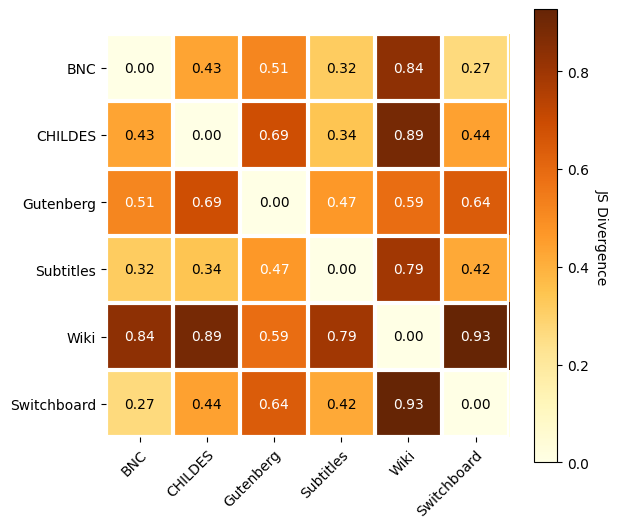

In [34]:
# plot confusion matrix
import matplotlib.pyplot as plt

def plot_confusions(divergence, output=None):
	BABYLM_LABELS = {
		'bnc_spoken.train': 'BNC',
		'childes.train': 'CHILDES',
		'gutenberg.train': 'Gutenberg',
		'open_subtitles.train': 'Subtitles',
		'switchboard.train': 'Switchboard',
		'simple_wiki.train': 'Wiki'
	}

	fig, ax = plt.subplots(figsize=(6.3, 6.3))

	# Plot the heatmap
	im = ax.imshow(divergence, cmap=plt.get_cmap('YlOrBr'))

	# Create colorbar
	cbar = ax.figure.colorbar(im, ax=ax, shrink=0.8)
	cbar.ax.set_ylabel('JS Divergence', rotation=-90, va="bottom")

	# set tick labels
	ax.set_xticks(np.arange(len(divergence)))
	ax.set_yticks(np.arange(len(divergence)))
	ax.set_xticklabels(BABYLM_LABELS[r] for r in statistics.index)
	ax.set_yticklabels(BABYLM_LABELS[r] for r in statistics.index)

	# Rotate the tick labels and set their alignment
	plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

	# Turn spines off and create white grid
	for edge, spine in ax.spines.items():
		spine.set_visible(False)

	ax.set_xticks(np.arange(divergence.shape[1]+1)-.5, minor=True)
	ax.set_yticks(np.arange(divergence.shape[0]+1)-.5, minor=True)
	ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
	ax.tick_params(which="minor", bottom=False, left=False)

	# Add text annotations with values
	thresh = np.max(divergence) / 2.
	for i in range(len(divergence)):
		for j in range(len(divergence)):
			value = divergence[i, j]
			text_color = "white" if value > thresh else "black"
			ax.text(j, i, f"{value:.2f}", ha="center", va="center", color=text_color)

	fig.tight_layout()
	if output is not None:
		plt.savefig(output, bbox_inches='tight', pad_inches=.05)
	plt.show()

plot_confusions(divergence, output='../outputs/annotation_overlaps.pdf')

We can dive deeper into which types of annotations diverge the most/least:

In [11]:
# print sorted divergences by type
for comparison, divergence in sorted(divergence_by_comparison.items(), key=lambda i: i[1], reverse=True):
	print(comparison, ':', divergence)

('simple_wiki.train', 'switchboard.train', 'NumForm') : 0.631539124297344
('bnc_spoken.train', 'simple_wiki.train', 'NumForm') : 0.6211858271134201
('simple_wiki.train', 'switchboard.train', 'Polarity') : 0.5727087718203813
('childes.train', 'simple_wiki.train', 'ExtPos') : 0.5558627802469315
('simple_wiki.train', 'switchboard.train', 'ExtPos') : 0.5527130054496452
('open_subtitles.train', 'simple_wiki.train', 'Person') : 0.5235257302707723
('bnc_spoken.train', 'simple_wiki.train', 'ExtPos') : 0.503954476082372
('simple_wiki.train', 'switchboard.train', 'Person') : 0.49010546878061473
('bnc_spoken.train', 'simple_wiki.train', 'Polarity') : 0.48727798915122805
('open_subtitles.train', 'simple_wiki.train', 'ExtPos') : 0.48519313316703777
('childes.train', 'simple_wiki.train', 'Person') : 0.46598331869939597
('gutenberg.train', 'switchboard.train', 'Polarity') : 0.4578865239051704
('bnc_spoken.train', 'gutenberg.train', 'Style') : 0.4567452009674608
('childes.train', 'simple_wiki.train', 

In [12]:
normalized['Polarity']

,Neg,Pos
bnc_spoken.train,0.435238,0.564762
childes.train,0.490353,0.509647
gutenberg.train,0.902925,0.097075
open_subtitles.train,0.667487,0.332513
simple_wiki.train,0.994087,0.005913
switchboard.train,0.296862,0.703138


In [14]:
normalized['Person']

,1,2,3
bnc_spoken.train,0.318298,0.220490,0.461212
childes.train,0.228942,0.342348,0.428710
gutenberg.train,0.191123,0.101107,0.707771
open_subtitles.train,0.347838,0.315818,0.336344
simple_wiki.train,0.010719,0.009192,0.980089
switchboard.train,0.406358,0.203771,0.389871


In [15]:
normalized['Gender']

,Fem,"Fem,Masc",Masc,Neut
bnc_spoken.train,0.143271,0.000000,0.253494,0.603235
childes.train,0.163418,0.000006,0.270674,0.565903
gutenberg.train,0.251715,0.000003,0.511168,0.237114
open_subtitles.train,0.176985,0.000004,0.337837,0.485174
simple_wiki.train,0.168460,0.000017,0.468154,0.363370
switchboard.train,0.098247,0.000000,0.159724,0.742029


In [16]:
normalized['Gender'].mean()

Fem         0.167016
Fem,Masc    0.000005
Masc        0.333508
Neut        0.499471
dtype: float64